Created on February 19, 2023 // @author: Sarah Shi, converted Kent Ratajeski's SERC modules to Python and added content; modified and updated May 10, 2023 by Karin Block-Cora for CUNY Workshop; September 20,2024 for GSA Connects.
Link to Sarah's version: https://rb.gy/h8uen

Install GMT for mapping, NumPy for simple math operations, Pandas for data tables, Matplotlib for plots. #do it in this order as PyGMT can by a bit fussy.

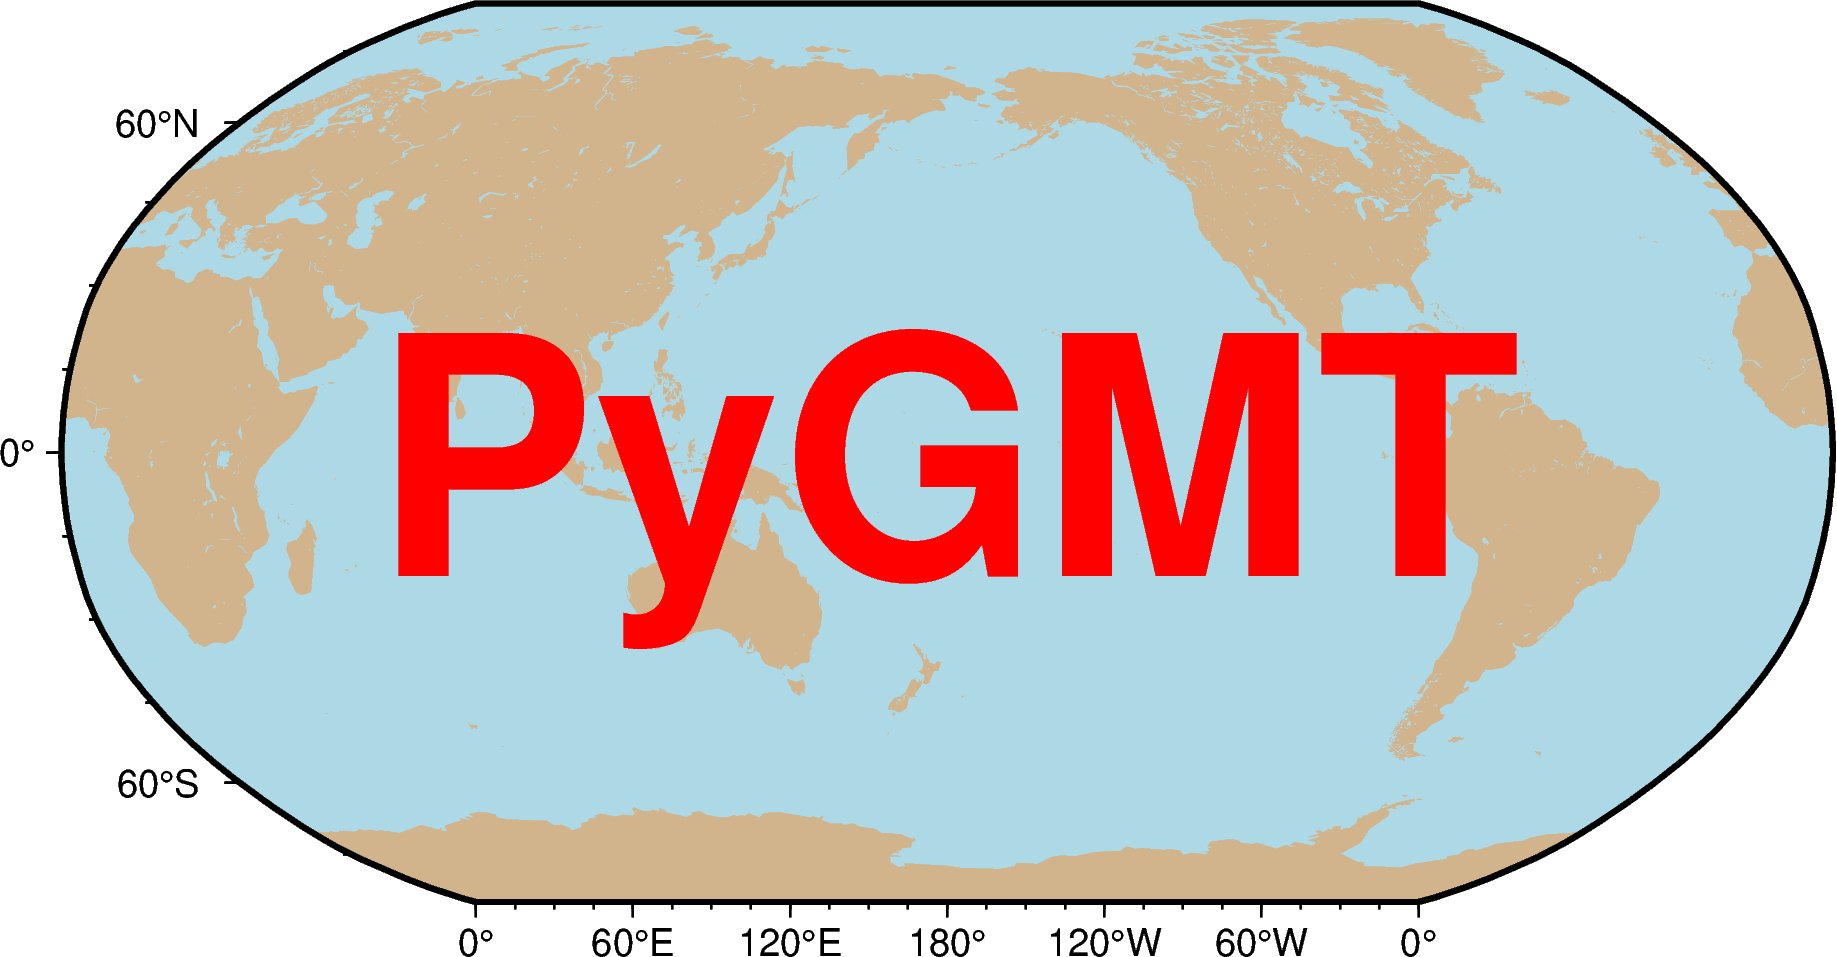

In [1]:
import pygmt
fig = pygmt.Figure()
fig.coast(projection="N15c", region="g", frame=True, land="tan", water="lightblue")
fig.text(position="MC", text="PyGMT", font="80p,Helvetica-Bold,red@75")
fig.show()

In [3]:
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import filedialog

# Create a root window and hide it
root = tk.Tk()
root.withdraw()

# Open a file dialog to select the CSV file
file_path = filedialog.askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])

# Check if a file was selected
if file_path:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print("No file selected.")

              Sample_ID Material   SiO2  TiO2  Al2O3    FeO  Cr2O3   MnO  \
0           SHK0462-006       WR  45.31  1.34  16.04  10.91    NaN  0.16   
1       HLY0102-005-002       GL  46.42  2.85  15.55  12.68    NaN   NaN   
2       HLY0102-028-015       GL  46.81   NaN    NaN    NaN    NaN   NaN   
3  JCR0031-ROPOS-434-1A       WR  46.84  1.68  15.99  10.74    NaN  0.16   
4       END0113-004-001       GL  47.29  1.39  16.59  11.23    NaN  0.18   

     MgO    CaO  ...  Elevation   Depth          Tectonic  \
0   6.44  11.22  ...        NaN     NaN     FRACTURE_ZONE   
1   7.38  10.03  ...    -4098.5  4098.5  SPREADING_CENTER   
2   8.67    NaN  ...    -4075.0  4075.0  SPREADING_CENTER   
3   6.10  11.45  ...        NaN     NaN     FRACTURE_ZONE   
4  10.59  10.24  ...    -2520.0  2520.0  SPREADING_CENTER   

                          Rock          Expedition  \
0  IVM, igneous:volcanic:mafic  SHINKAI 6500 D462    
1  IVM, igneous:volcanic:mafic         HEALY 0102    
2  IVM, igneou

In [4]:
df.head()

,Sample_ID,Material,SiO2,TiO2,Al2O3,FeO,Cr2O3,MnO,MgO,CaO,...,Elevation,Depth,Tectonic,Rock,Expedition,Reference,Method,Sample_ID.1,Material.1,Elevation_km
0,SHK0462-006,WR,45.31,1.34,16.04,10.91,NaN,0.16,6.44,11.22,...,NaN,NaN,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",SHINKAI 6500 D462,"COOGAN, 2004",NaN,SHK0462-006,WR,NaN
1,HLY0102-005-002,GL,46.42,2.85,15.55,12.68,NaN,NaN,7.38,10.03,...,-4098.5,4098.5,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",HEALY 0102,"MICHAEL, 2003; GOLDSTEIN, 2008",DCP; TIMS; EMP; ICPMS,HLY0102-005-002,GL,-4.0985
2,HLY0102-028-015,GL,46.81,NaN,NaN,NaN,NaN,NaN,8.67,NaN,...,-4075.0,4075.0,SPREADING_CENTER,"IVM, igneous:volcanic:mafic",HEALY 0102,"GOLDSTEIN, 2008",TIMS; EMP; ICPMS,HLY0102-028-015,GL,-4.0750
3,JCR0031-ROPOS-434-1A,WR,46.84,1.68,15.99,10.74,NaN,0.16,6.10,11.45,...,NaN,NaN,FRACTURE_ZONE,"IVM, igneous:volcanic:mafic",JR31,"COOGAN, 2004",NaN,JCR0031-ROPOS-434-1A,WR,NaN
4,END0113-004-001,GL,47.29,1.39,16.59,11.23,NaN,0.18,10.59,10.24,...,-2520.0,2520.0,SPREADING_CENTER,,EN113,"HANAN, 1989; SCHILLING, 1985; FONTIGNIE, 1991;...",MS; EMP; ICPMS; MS-ID,END0113-004-001,GL,-2.5200


To extract particular columns of data you can reference them in two ways as follows:

In [5]:
df['SiO2']

0       45.31
1       46.42
2       46.81
3       46.84
4       47.29
        ...  
2461      NaN
2462      NaN
2463      NaN
2464      NaN
2465      NaN
Name: SiO2, Length: 2466, dtype: float64

In [6]:
df.SiO2

0       45.31
1       46.42
2       46.81
3       46.84
4       47.29
        ...  
2461      NaN
2462      NaN
2463      NaN
2464      NaN
2465      NaN
Name: SiO2, Length: 2466, dtype: float64

Let's plot the consolidated data. Start by making an x-y plot of longitude on the x-axis vs. latitude on the y-axis

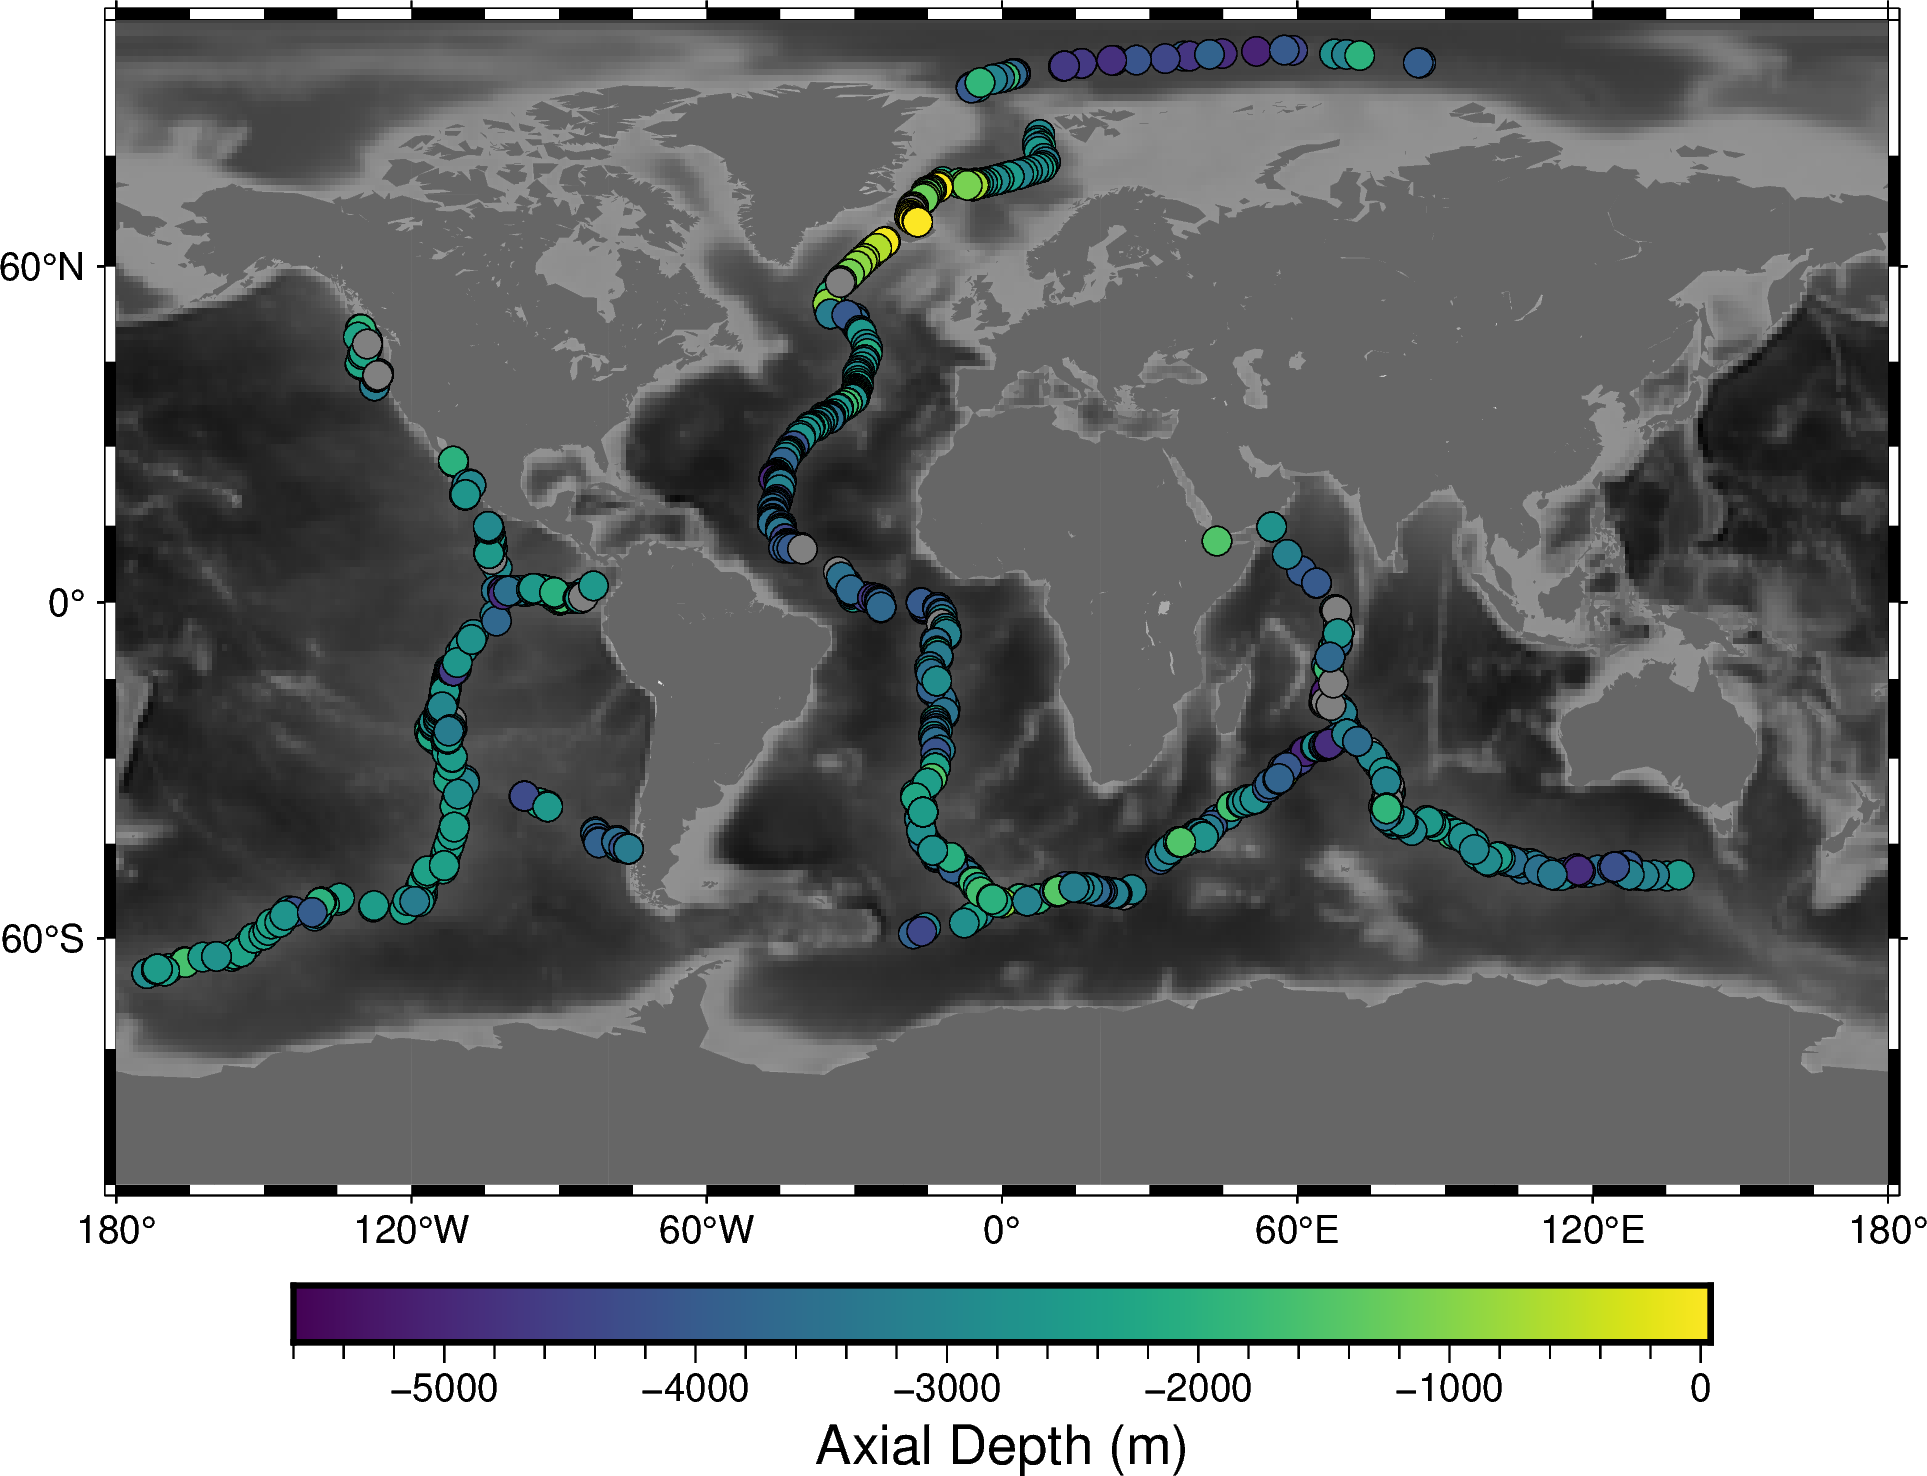

In [7]:
grid = pygmt.datasets.load_earth_relief() # loads earth relief
fig = pygmt.Figure() # defines a figure
fig.subplot(nrows = 1, ncols = 1, figsize = ('20c', '15c')) # defines a plot with size
# Plot the earth relief grid on Cylindrical Stereographic projection, masking
fig.basemap(region="g", projection="Cyl_stere/0/-20/15c", frame=True) # creates the base projection map
fig.grdimage(grid=grid, cmap="gray", transparency=40,) # sets the background depiction of bathymetry
fig.coast(land="#666666") # creates continents

pygmt.makecpt(cmap="viridis", series=[df.Elevation.min(), df.Elevation.max()]) # defines a colormap with color ranging from minimum to maximum bathymetric elevation
fig.plot(x=df.Longitude, y=df.Latitude, style="c0.25c", # plot x and y, with color of scatter points showing bathymetric elevation
    fill=df.Elevation,
    cmap=True, pen='black', transparency=40,)
fig.colorbar(frame='af+l"Axial Depth (m)"') # create colorbar
fig.show()

1. Does this plot look familiar? Can you identify the Mid-Atlantic Ridge and the East Pacific Rise? These are the two best studied mid-ocean ridges.

2. What is plotted on the x-axis? and y-axis? What do the colors of the points represent?

Let's visualize 𝑆𝑖𝑂2 (y-axis) vs. 𝑀𝑔𝑂 (x-axis), and 𝐹𝑒𝑂 (y-axis) vs. 𝑀𝑔𝑂 (x-axis). We can do this by using the matplotlib package, which we imported at the start. I show below how you plot 𝑆𝑖𝑂2 vs. 𝑀𝑔𝑂 , as an example.

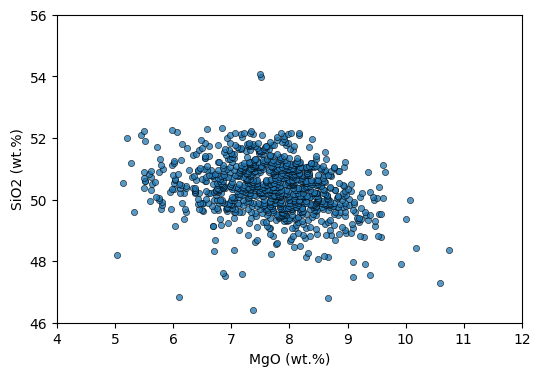

In [8]:
# Assuming df is your DataFrame
ax = df.plot.scatter(x='MgO', y='SiO2', figsize=(6, 4), edgecolor='k', linewidth=0.5, alpha=0.75)

# Set the labels and limits
ax.set_xlabel('MgO (wt.%)')
ax.set_ylabel('SiO2 (wt.%)')
ax.set_xlim([4, 12])
ax.set_ylim([46, 56])

# Show the plot
plt.show()